In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re as re
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics

In [3]:
db_fraud = pd.read_csv(r"bs140513_032310.csv")
db_fraud.head(4)        

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0


In [4]:
db_fraud.drop(["zipcodeOri", "zipMerchant"], axis=1, inplace=True)
db_fraud.shape 

(594643, 8)

In [5]:
cols = ["customer", "age", "gender", "merchant","category"]
for col in cols:
    db_fraud[col]= db_fraud[col].apply(lambda x: x.replace('\'','')) #remove quotes from the columns
db_fraud.head(3)
db_fraud["category"].replace({"es_transportatio": "es_transportation"}, inplace=True) #correct the transavtion
#db_fraud["category"].replace(,[new_value1, new_value2, new_value3])
db_fraud.category.unique()

array(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],
      dtype=object)

In [6]:
db_fraud["category"].replace(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],['transportation', 'health', 'otherservices', 'food',
       'hotelservices', 'barsandrestaurants', 'tech',
       'sportsandtoys', 'wellnessandbeauty', 'hyper',
       'fashion', 'home', 'contents', 'travel', 'leisure'], inplace=True)

In [8]:
db_fraud["ageCateg"] = db_fraud["age"].apply(lambda x: str(x)+' years' if x!=np.NaN else "Unknown") #make age a categoric year

In [10]:
def dummies_create(value, data=db_fraud):
  x=pd.get_dummies(data[value])
  return x
a = dummies_create(value="gender").reset_index()
b = dummies_create(value="category").reset_index()

In [12]:
#c = dummies_create(value="customer").reset_index()
#d = dummies_create(value="merchant").reset_index()
e = dummies_create(value="ageCateg").reset_index()
 #create dummies of each categorical variable/
f = db_fraud["amount"].reset_index()

In [24]:
X = pd.merge(left=a.iloc[:,:-1], right=b.iloc[:,:-1], how="inner", on="index")
X = pd.merge(left=X, right=e.iloc[:,:-1], how="inner", on="index")
X = pd.merge(left=X, right=f, how="inner", on="index")

In [26]:
X.drop(columns="index", inplace=True)

In [27]:
X

,E,F,M,barsandrestaurants,contents,fashion,food,health,home,hotelservices,hyper,leisure,otherservices,sportsandtoys,tech,transportation,travel,0 years,1 years,2 years,3 years,4 years,5 years,6 years,amount
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4.55
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,39.68
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,26.89
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,17.25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,35.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,20.53
594639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,50.73
594640,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,22.44
594641,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,14.46


In [33]:
y = db_fraud["fraud"]

In [34]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [35]:
 #instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[146750,    115],
       [   754,   1042]])

In [39]:
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

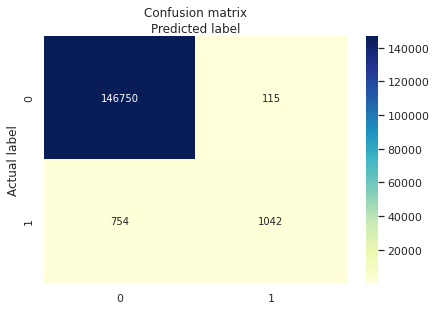

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Text(0.5,257.44,'Predicted label')

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 146 750 and 1042 are actual predictions, and 115 and 754 are incorrect predictions.

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9941544857090965
Precision: 0.9006050129645635
Recall: 0.5801781737193764


Well, we go a classification rate of 99%, considered as good accuracy

In the prediction case,  when your Logistic Regression model predicted transactions are going to be fraudulent, that transactions have 90% of the time.

In [ ]:
In the prediction case,  when your Logistic Regression model predicted transactions are going to be fraudulent, that transactions have 90% of the time.

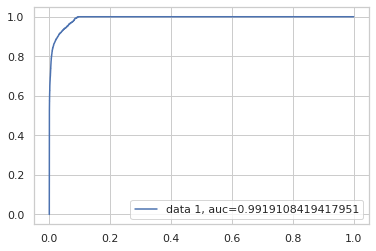

In [44]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
import statsmodels.api as sm
#X = df_final.drop(columns=["y"])
#y = df_final[["y"]]
log_reg = sm.Logit(y,X).fit()
print(log_reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.018242
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               594643
Model:                          Logit   Df Residuals:                   594618
Method:                           MLE   Df Model:                           24
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.7214
Time:                        15:14:25   Log-Likelihood:                -10847.
converged:                      False   LL-Null:                       -38936.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
E                     -5.5865      0.517    -10.811      0.000      -6.599      -4.574
F                     12.9691    398.962      0.033      0.974    -768.982     794.921
M                   

The significative variable are: Entreprise status, bar and restaurants service card usage, 